In [1]:
import time
import random
import ai2thor
import ai2thor_colab

from ai2thor_colab import plot_frames
from ai2thor.controller import Controller

from IPython.display import clear_output

In [2]:
from ai2thor.platform import CloudRendering
controller = Controller(platform=CloudRendering)

In [3]:
import torch
torch.cuda.is_available()

True

## Workspace

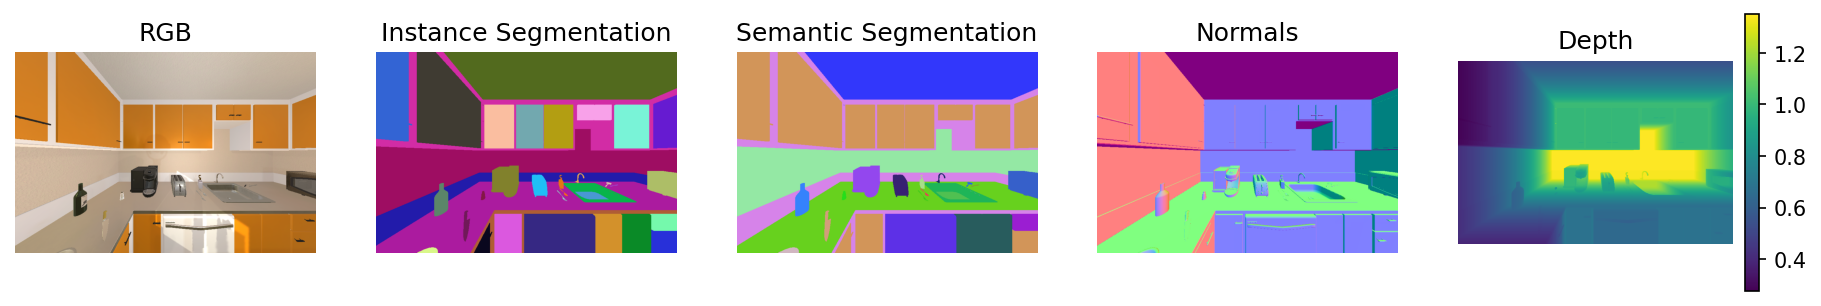

In [10]:
floor_index = random.randint(0, 30)
floor_index = 20

controller = Controller(
    agentMode = "default", # arm
    visibilityDistance = 1.5,
    scene = f"FloorPlan{floor_index}",

    # step sizes
    gridSize = 0.25,
    snapToGrid = True,
    rotateStepDegrees = 90,

    # image modalities
    renderInstanceSegmentation = True,
    renderDepthImage = True,
    renderSemanticSegmentation = True,
    renderNormalsImage = True,
    
    # camera properties
    width = 900,
    height = 600,
    fieldOfView = 120
)

plot_frames(controller.last_event)

In [5]:
import pandas as pd

data = controller.last_event.metadata['objects']

df_data = pd.DataFrame(data)

In [17]:
action_space = ["MoveAhead", "MoveLeft", "MoveRight", "MoveBack", "RotateLeft", "RotateRight"]
# action_space = ["MoveAhead", "MoveLeft", "MoveRight", "MoveBack", "RotateLeft", "RotateRight", "OpenObject", "ToggleObjectOn"]

for i in range(3):

    print("--- Episode:", i+1)
    # initialize the environment and state
    controller.reset(random=True)

    for j in range(1):

        random_index = random.randint(0, 5)

        if action_space[random_index] == "RotateLeft" or action_space[random_index] == "RotateRight":
            print("Action:", j+1)
            print("Action:\033[91m", action_space[random_index])
        else:
            print("Action:", j+1)
            print("Action:\033[92m", action_space[random_index])

        controller.step(
            action = action_space[random_index]
        )
    
        time.sleep(1)
    
    clear_output(wait=True)
    

--- Episode: 3
Action: 1
Action: MoveRight


In [19]:
action_space = ["MoveAhead", "MoveLeft", "MoveRight", "MoveBack", "RotateLeft", "RotateRight"]

for i in range(3):

    print("--- Episode:", i+1)
    # initialize the environment and state
    controller.reset(random=True)

    for j in range(1):

        random_index = random.randint(0, 5)

        if action_space[random_index] == "RotateLeft" or action_space[random_index] == "RotateRight":
            print("Action:", j+1)
            print("Action:\033[91m", action_space[random_index])
        else:
            print("Action:", j+1)
            print("Action:\033[92m", action_space[random_index])

        random_position = {
            "x": random.uniform(-4.0, 4.0),  # Adjust the range as needed
            "y": 0.0,  # You can customize the height if needed
            "z": random.uniform(-4.0, 4.0),
        }

        random_rotation = {
            "x": 0.0,  # You can customize the pitch if needed
            "y": random.uniform(0, 360),  # Set the yaw to a random angle in degrees
            "z": 0.0,  # You can customize the roll if needed
        }

        # Set the agent's initial position and rotation
        controller.step(
            action="TeleportFull",
            x=random_position["x"],
            y=random_position["y"],
            z=random_position["z"],
            rotation=random_rotation,
            horizon=30.0,  # Set to a default value (adjust as needed)
            standing=True,  # Set to True to indicate the agent is standing
        )
    
        time.sleep(1)
    
    clear_output(wait=True)

--- Episode: 3
Action: 1
Action: MoveRight


---